
# Feature Engineering in Machine Learning



## 1. What is Feature Engineering and Why is it Required?

**Feature engineering** is the process of transforming raw data into meaningful representations (features) that make machine learning models more effective. It includes **cleaning**, **encoding**, **scaling**, **creating**, **selecting**, and **extracting** features.

Why it matters:

- Better features often lead to better models than changing algorithms.
- Reduces overfitting by removing noisy/irrelevant features.
- Can simplify models and speed up training/inference.
- Improves interpretability.

Mathematically, learning aims to approximate a function $ f^* : \mathbb{R}^d \to \mathbb{R} $ (or to a finite label set) by learning parameters $ \theta $ of a model $ f(x;\theta) $.  
Feature engineering transforms inputs with a mapping $ \phi: \mathbb{R}^d \to \mathbb{R}^{d'} $ so that the model
$$
\hat{y} = f(\phi(x); \theta)
$$
is **simpler**, **more regularized**, or **more accurate**. 



## 2. Overview of Feature Engineering Techniques

We will cover the following categories, each with a short explanation and then code:

1. **EDA & Preprocessing**  
   - Missing values, scaling, encoding, train/test split.

2. **Feature Extraction** (create new features from existing ones)
   - Principal Component Analysis (PCA).
   - Independent Component Analysis (ICA).
   - Polynomial / Interaction Features.

3. **Feature Selection** (choose a subset of existing features)
   - **Filter methods:** Variance Threshold, univariate tests (F-test), Mutual Information.
   - **Wrapper methods:** Recursive Feature Elimination (RFE), RFECV.
   - **Embedded methods:** L1-regularized models (LASSO / L1 Logistic Regression), Tree-based importance.

Throughout, we will use the **Breast Cancer Wisconsin dataset** from `sklearn.datasets` (30 numeric features, 569 rows).  



## 3. Load the Dataset (Breast Cancer Wisconsin)

We will use the Breast Cancer Wisconsin dataset. It has 30 numeric features describing cell nuclei in images and a binary target (malignant/benign).


In [2]:

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

data = load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']

df = X.copy()
df['target'] = y
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5


## 4. Exploratory Data Analysis (EDA)

Goals:
- Understand feature ranges and distributions.
- Check missing values.
- Inspect class balance.
- Examine pairwise correlations.


Missing values per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Target distribution:
target
1    357
0    212
Name: count, dtype: int64


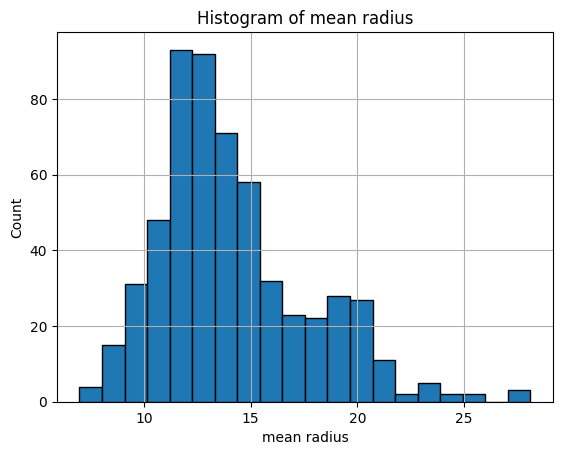

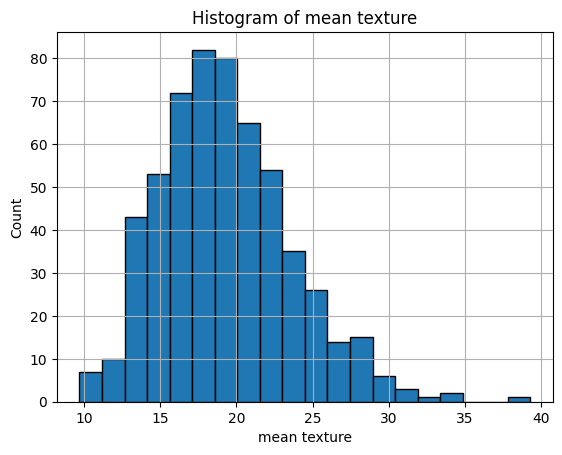

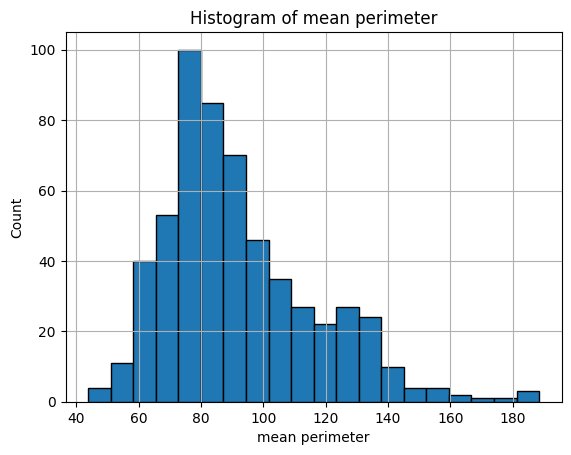

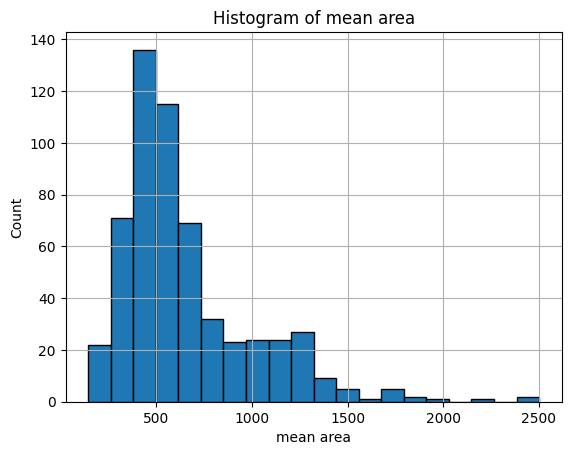

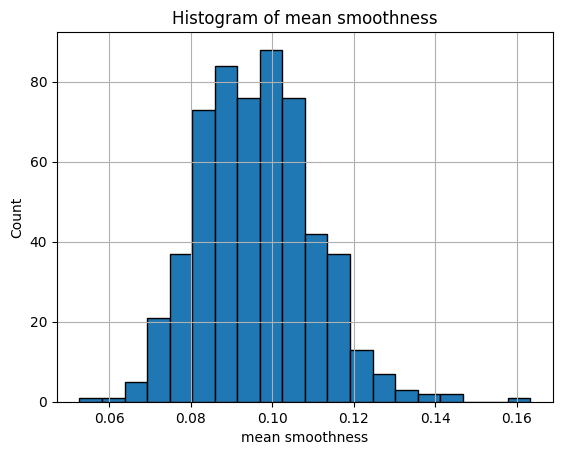

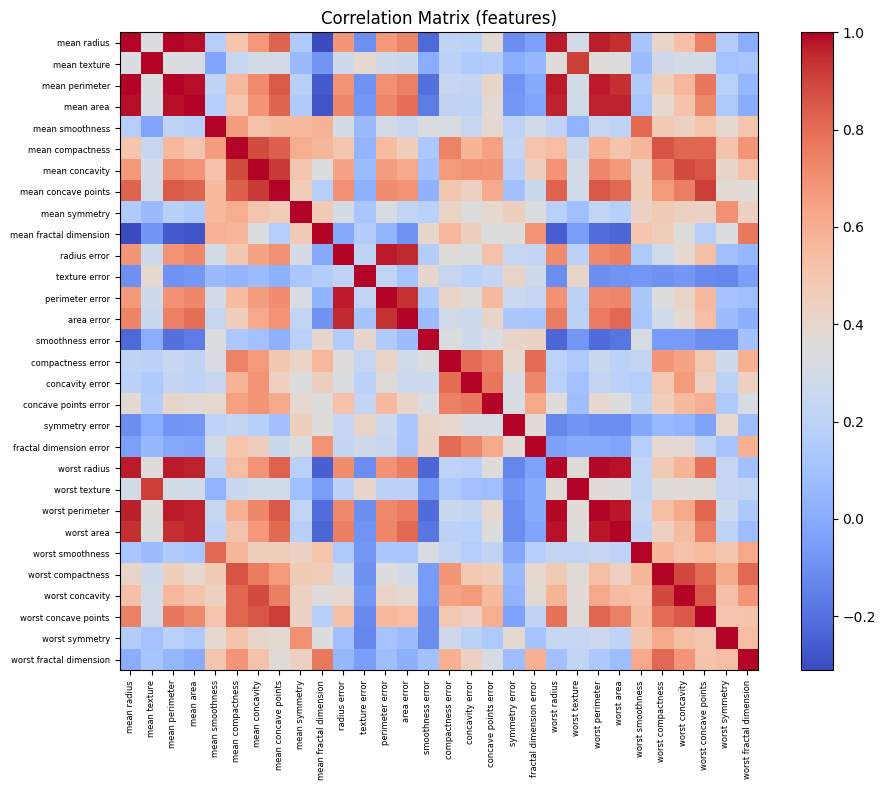

In [4]:

import matplotlib.pyplot as plt

print("Missing values per column:\n", X.isna().sum())
print("\nTarget distribution:")
print(y.value_counts())

# Histogram for a few features
for col in X.columns[:5]:
    plt.figure()
    X[col].hist(bins=20, edgecolor='k')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Correlation matrix heatmap
corr = X.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='nearest', cmap="coolwarm")
plt.title("Correlation Matrix (features)")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=6)
plt.tight_layout()
plt.show()



## 5. Preprocessing

Typical steps include:

- **Train/Test Split**  
- **Scaling**  
- **Encoding**  
- **Imputation**  

Let $ X \in \mathbb{R}^{n \times d} $ be features and $ y \in \{0,1\}^n $ labels.


In [5]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Preprocessing pipeline: impute + scale
preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
print("Processed shapes -> train:", X_train_proc.shape, " test:", X_test_proc.shape)


Processed shapes -> train: (426, 30)  test: (143, 30)


## Baseline logistic regression without any feature extraction / selection

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

baseline_clf = Pipeline(steps=[
    ("pre", preprocessor),
    ("clf", LogisticRegression(max_iter=500))
])

baseline_clf.fit(X_train, y_train)
y_pred = baseline_clf.predict(X_test)
print("Baseline LogisticRegression accuracy:", accuracy_score(y_test, y_pred))

Baseline LogisticRegression accuracy: 0.986013986013986



## 6. Feature Extraction

### 6.1 Principal Component Analysis (PCA)

**Idea:** Find orthogonal directions maximizing variance. 


In [7]:

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca_clf = Pipeline(steps=[
    ("pre", preprocessor),
    ("pca", PCA(n_components=10, random_state=42)),
    ("clf", LogisticRegression(max_iter=500))
])

pca_clf.fit(X_train, y_train)
y_pred = pca_clf.predict(X_test)
print("PCA (10 components) + LogisticRegression accuracy:", accuracy_score(y_test, y_pred))


PCA (10 components) + LogisticRegression accuracy: 0.9790209790209791



### 6.2 Independent Component Analysis (ICA)

**Idea:** ICA assumes observed data $ X $ is generated as a linear mixture of latent independent sources $ S $:
$$
X = A S
$$
where $ A $ is an unknown mixing matrix. ICA tries to recover $ S $ by estimating an unmixing matrix $ W $ such that
$$
S \approx W X
$$
with the constraint that components of $ S $ are **statistically independent**.  
Independence is measured by maximizing **non-Gaussianity** (e.g., kurtosis or negentropy).

**Why non-Gaussianity matters**

The Central Limit Theorem (CLT) says:

- If you add up independent random variables, the result tends to look more Gaussian (normally distributed).

So, mixtures of signals → more Gaussian.
Individual independent sources → less Gaussian (more "non-Gaussian").

We demonstrate using FastICA in sklearn.


In [8]:

from sklearn.decomposition import FastICA

ica_clf = Pipeline(steps=[
    ("pre", preprocessor),
    ("ica", FastICA(n_components=10, random_state=42, max_iter=1000)),
    ("clf", LogisticRegression(max_iter=500))
])

ica_clf.fit(X_train, y_train)
y_pred = ica_clf.predict(X_test)
print("ICA (10 components) + LogisticRegression accuracy:", accuracy_score(y_test, y_pred))


ICA (10 components) + LogisticRegression accuracy: 0.986013986013986



### 6.3 Polynomial and Interaction Features

**Idea:** Map inputs to higher dimensions including interactions.  
For degree 2:
$$
\phi(x) = [1, x_1, \dots, x_d, x_1^2, \dots, x_d^2, x_1 x_2, \dots]
$$


In [9]:

from sklearn.preprocessing import PolynomialFeatures

poly_clf = Pipeline(steps=[
    ("pre", Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2, include_bias=False))
    ])),
    ("clf", LogisticRegression(max_iter=1000))
])

poly_clf.fit(X_train, y_train)
y_pred = poly_clf.predict(X_test)
print("PolynomialFeatures (degree=2) + LogisticRegression accuracy:", accuracy_score(y_test, y_pred))


PolynomialFeatures (degree=2) + LogisticRegression accuracy: 0.965034965034965



## 7. Feature Selection

### 7.1 Filter Methods

Filter methods rely on **intrinsic properties** of features, independent of a model.

1. **Variance Threshold:** Remove features with low variance (near-constant across samples). Example: a feature with variance 0 adds no information.
2. **Univariate F-test (ANOVA):** ANOVA (Analysis of Variance) compares the variance between groups vs. the variance within groups.

In feature selection, the F-test checks whether different classes (target labels) have different mean values for a given feature.

High F-score → feature is more discriminative for the target.

Mathematically, for a feature $x$:

$$ F = \frac{\text{variance between groups}}{\text{variance within groups}}$$

3. **Mutual Information (MI):** Measures general dependency between feature $X$ and target $Y$:
$$ I(X;Y) = \sum_{x,y} p(x,y) \log \frac{p(x,y)}{p(x)p(y)} $$
MI captures both linear and non-linear dependencies.


In [12]:

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif

# Variance Threshold
vt = VarianceThreshold(threshold=0.5)
X_vt = vt.fit_transform(X_train_proc)
clf = LogisticRegression(max_iter=500)
clf.fit(X_vt, y_train)
print("VarianceThreshold -> kept features:", X_vt.shape[1])
print("Train accuracy:", clf.score(X_vt, y_train))

# F-test
skb_f = SelectKBest(score_func=f_classif, k=10)
X_f = skb_f.fit_transform(X_train_proc, y_train)
clf = LogisticRegression(max_iter=500)
clf.fit(X_f, y_train)
print("\nF-test selected features:", skb_f.get_support(indices=True))
print("Train accuracy:", clf.score(X_f, y_train))

# Mutual Information
skb_mi = SelectKBest(score_func=mutual_info_classif, k=10)
X_mi = skb_mi.fit_transform(X_train_proc, y_train)
clf = LogisticRegression(max_iter=500)
clf.fit(X_mi, y_train)
print("\nMI selected features:", skb_mi.get_support(indices=True))
print("Train accuracy:", clf.score(X_mi, y_train))


VarianceThreshold -> kept features: 30
Train accuracy: 0.9882629107981221

F-test selected features: [ 0  2  3  6  7 20 22 23 26 27]
Train accuracy: 0.9577464788732394

MI selected features: [ 0  2  3  6  7 13 20 22 23 27]
Train accuracy: 0.9577464788732394


### Visualizing Feature Importances

Below we plot the feature rankings obtained from:

- **F-test**
- **Mutual Information**

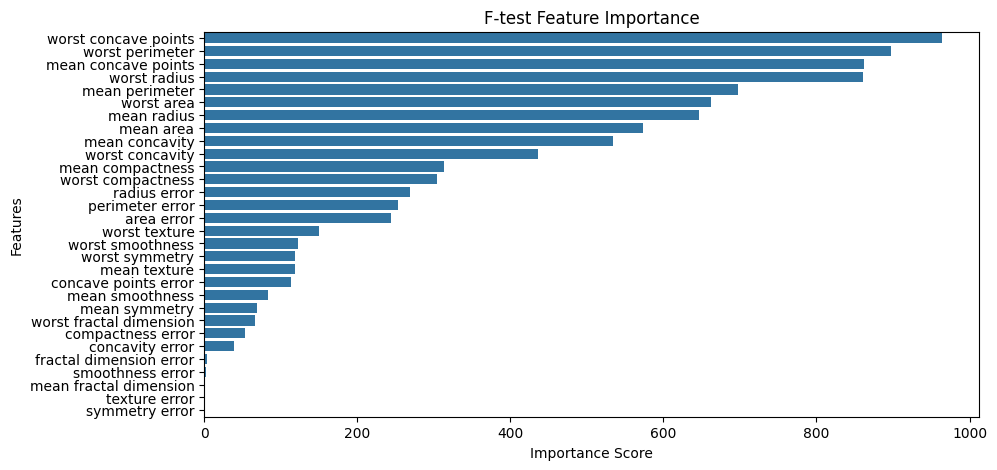

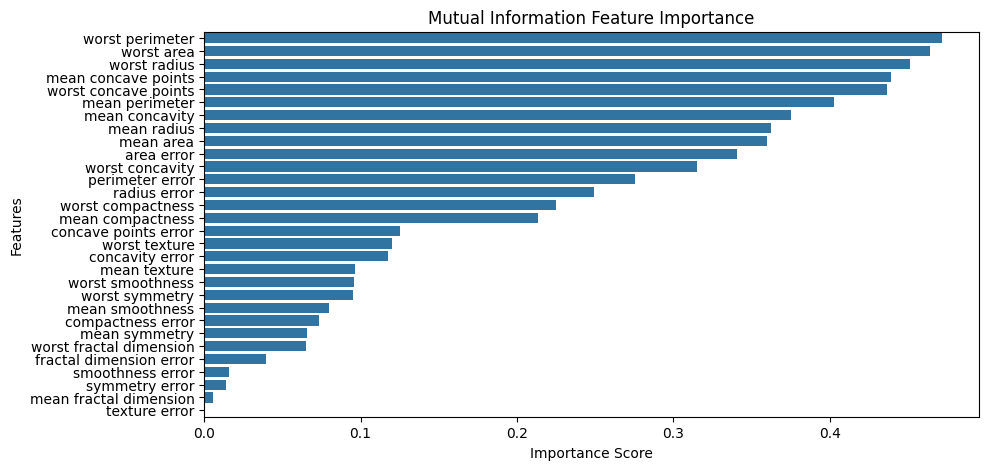

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot feature importances
def plot_feature_importances(scores, feature_names, title):
    plt.figure(figsize=(10,5))
    sorted_idx = scores.argsort()[::-1]
    sns.barplot(x=scores[sorted_idx], y=np.array(feature_names)[sorted_idx])
    plt.title(title)
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()

# F-test scores visualization
plot_feature_importances(f_classif(X, y)[0], X.columns, "F-test Feature Importance")

# Mutual Information scores visualization
mi_scores = mutual_info_classif(X, y, random_state=42)
plot_feature_importances(mi_scores, X.columns, "Mutual Information Feature Importance")


### 7.2 Wrapper Methods

Wrapper methods evaluate subsets by training a model.

- **RFE (Recursive Feature Elimination):** Iteratively removes least important features.
- **RFECV:** Chooses number of features with cross-validation.


In [14]:

from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

base_clf = LogisticRegression(max_iter=1000, solver="liblinear")

rfe = RFE(estimator=base_clf, n_features_to_select=10)
rfe.fit(X_train_proc, y_train)
print("RFE selected features:", np.where(rfe.support_)[0])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfecv = RFECV(estimator=base_clf, step=1, cv=cv, scoring="accuracy")
rfecv.fit(X_train_proc, y_train)
print("RFECV optimal number of features:", rfecv.n_features_)


RFE selected features: [ 3 10 13 20 21 22 23 24 26 27]
RFECV optimal number of features: 20



### 7.3 Embedded Methods

- **L1 Logistic Regression:** Encourages sparsity in coefficients by $ L1 $ penalty.  
- **Tree-based models:** Measure feature importance from impurity reduction.


In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

l1_clf = LogisticRegression(penalty="l1", solver="saga", max_iter=5000, C=0.3)
l1_clf.fit(X_train_proc, y_train)
print("L1 Logistic Regression non-zero features:", np.sum(l1_clf.coef_ != 0))

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_proc, y_train)
importances = rf.feature_importances_
idxs = np.argsort(importances)[::-1][:10]
print("Top 10 RF features:", idxs)


L1 Logistic Regression non-zero features: 10
Top 10 RF features: [22 23 27  7 20  2  0  6  3 26]



## 8. Pipelines and Comparison


In [16]:

from sklearn.model_selection import cross_val_score

baseline = Pipeline(steps=[("pre", preprocessor), ("clf", LogisticRegression(max_iter=1000))])
selectk = Pipeline(steps=[("pre", preprocessor), ("sel", SelectKBest(score_func=f_classif, k=10)), ("clf", LogisticRegression(max_iter=1000))])
pca_pipe = Pipeline(steps=[("pre", preprocessor), ("pca", PCA(n_components=10)), ("clf", LogisticRegression(max_iter=1000))])

for name, pipe in [("Baseline", baseline), ("SelectKBest(F)", selectk), ("PCA", pca_pipe)]:
    scores = cross_val_score(pipe, X, y, cv=5, scoring="accuracy")
    print(f"{name} CV accuracy: mean={scores.mean():.3f}, std={scores.std():.3f}")


Baseline CV accuracy: mean=0.981, std=0.007
SelectKBest(F) CV accuracy: mean=0.951, std=0.026
PCA CV accuracy: mean=0.981, std=0.007



## 9. Practical Tips

- Always split train/test before selection.
- Use pipelines to prevent leakage.
- Use domain knowledge when possible.
- For high-dimensional data, start with filters or L1 models.
